## Project #1
## Create a Neural Network In Python

bold text![image-3.png](attachment:image-3.png)

![image.png](attachment:image.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import pandas as pd

In [ ]:
###segmoid function ACTIVATION FUNCTION :
def sigmoid(Z):
  return 1/(1+np.power(np.e,-Z))
#sigmoid(4)

In [ ]:
#create w and b according to the layer size:
#assume size=4 #with the last layer (output layer)
#3 w and 3 b
#returns w and b
#using dictionaries to get the variables with their names
def generate_W_b(Size_of_each_layer):
    print("layers",Size_of_each_layer)
    W = {}
    B={}
    for i in range(1, len(Size_of_each_layer)):
      rows=Size_of_each_layer[i]
      columns_of_w= Size_of_each_layer[i-1]
      W['w'+str(i)] = np.random.randn(rows,columns_of_w);
      B['b'+str(i)] = np.random.randn(rows,1);
    return W,B
#W,B=generate_W_b([2,3,4,2])
#print(W);
#print(B);

In [ ]:
W,B=generate_W_b([2,3,3,2]);
print(W);
print(B);

layers [2, 3, 3, 2]
{'w1': array([[ 2.44040919,  0.08086548],
       [ 0.84830872, -1.33039465],
       [-0.78521966, -0.09542712]]), 'w2': array([[ 0.48523988,  0.31070101, -1.20272754],
       [ 0.14046951,  0.43844306, -1.01194591],
       [ 0.03154294,  0.96890383, -1.9001255 ]]), 'w3': array([[-0.46712658, -1.84339976, -0.03871608],
       [-0.81045923,  1.47177112, -0.37637811]])}
{'b1': array([[-0.12242263],
       [-0.11157714],
       [ 0.52652877]]), 'b2': array([[0.76164652],
       [1.01984524],
       [0.22633484]]), 'b3': array([[-1.37998559],
       [ 1.43881677]])}


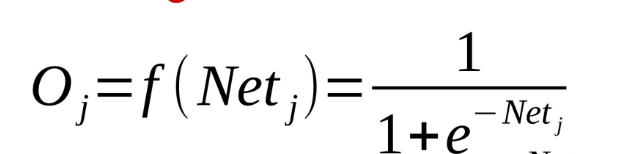

In [ ]:
#forward
#returns:sigmoid(wx+b)
# first layer after input : sigmoid(wx+b)
# second layer: w*[sigmoid(wx+b)of i-1 ]+b
#last layer: sigmoid=Net
def Forward(X_train,W,B,Size_of_each_layer):



    Net={}    #WX+B
    O={}      #SIGMOID
    num_of_layers=len(Size_of_each_layer)-1
    print("number of layers",num_of_layers)



    for i in range(1,len(Size_of_each_layer)):
      if i==1:  #in first layer
        Net['Net'+str(i)] = np.dot(W['w'+str(i)],X_train) + B['b'+str(i)];

        O['O'+str(i)] = sigmoid(Net['Net'+str(i)]);
      else: #in middle
        Net['Net'+str(i)] = np.dot(W['w'+str(i)], O['O'+str(i-1)]) + B['b'+str(i)];

        if i != num_of_layers:  #in middle
           O['O'+str(i)] = sigmoid(Net['Net'+str(i)]);
        else:
           O['O'+str(i)] = Net['Net'+str(i)];
    return Net,O

W,B=generate_W_b([2,3,3,2]);
print(W);
print(B);
X,Y=Forward([2,4],W,B,[2,3,3,2]);
print(X);
print(Y);
################################NOT FINAL###################

layers [2, 3, 3, 2]
{'w1': array([[ 1.246049  ,  1.52694272],
       [-1.08339141, -0.43885015],
       [-1.23243673,  0.54537637]]), 'w2': array([[ 0.16390476, -0.0294064 ,  0.75234787],
       [-0.51114875, -1.95828039,  0.01992738],
       [ 0.09792787, -0.49873031, -1.30286902]]), 'w3': array([[ 0.38141504, -0.85788491, -0.27702225],
       [ 0.68269827,  0.74287279, -1.05147522]])}
{'b1': array([[-0.2961337 ],
       [-1.2194188 ],
       [ 1.27040335]]), 'b2': array([[-0.70572894],
       [ 1.73535983],
       [ 0.1592103 ]]), 'b3': array([[1.01842706],
       [0.32719299]])}
number of layers 3
{'Net1': array([[ 8.30373518, -4.21831712, -0.57950167],
       [ 7.38045007, -5.14160223, -1.50278678],
       [ 9.87027223, -2.65178007,  0.98703538]]), 'Net2': array([[ 0.18105614, -0.65395749, -0.10414476],
       [-0.71279656,  1.71786994,  1.2099233 ],
       [-1.54410738,  0.07189923, -0.84554563]]), 'Net3': array([[0.89538494, 0.27805871, 0.45518811],
       [0.75875537, 0.64596122

In [ ]:
def cost(y_train,O):
 num_of_layers = len(O)//2
 y_pred=O['O'+str(num_of_layers)]  #at output layer only
 error=1/2*np.sum(np.square(y_pred-y_train))
 return error
#######################################NOT SURE OF THE EQUATION

In [ ]:
#Backward
#in last layer:
#in middle:
#in first layer:
def Backward(X_train,y_train,W,B,Size_of_each_layer,Net,O):

     Back_W={}
     Back_B={}
     num_of_layers=len(Size_of_each_layer)-1



     for i in range(num_of_layers,0,-1):
        if i==1: #in last layer:
          W['w'+str(i)]=np.dot(diff_Net,X_train)
          B['b'+str(i)]=np.sum(diff_Net)

        else:
          W['w'+str(i)]=np.dot(diff_Net, O['O'+str(i-1)].T)
          B['b'+str(i)]=np.sum(diff_Net)
        if i!=num_of_layers:
           print(i)
           print(diff_O)
           print(diff_Net)
           print(W['w'+str(i+1)])
           diff_O= np.dot(W['w'+ str(i+1)].T, diff_Net)
        else:
           diff_O= O['O'+str(i)]- y_train
           print(diff_O)
           print(i)
           diff_Net=diff_O
           print(diff_Net)

     return Back_B,Back_W

# Error :

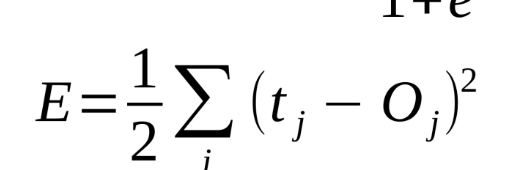

In [ ]:
#generate new W and B:
def generate_W_b_new(Size_of_each_layer,MEU,Back_B,Back_W):
    print("layers",Size_of_each_layer)
    W_new = {}
    B_new={}
    num_of_layers=len(Size_of_each_layer)-1
    for i in range(1, len(Size_of_each_layer)):
      rows=Size_of_each_layer[i]
      W_new['w'+str(i)] = W['w'+ str(i+1)]-MEU*Back_W['w' + str(i)]
      B_new['b'+str(i)] = B['b'+ str(i+1)]-MEU*Back_B['b' + str(i)]
    return W_new,B_new

Shape of y_train (120,)
Shape of y_test (30,)


In [ ]:
def NN(X_train, y_train,num_of_layers,Maximum_number_of_iterations,Meu):
  W,B=generate_W_b(Size_of_each_layer);
  for i in range(Maximum_number_of_iterations):
    Net,O=Forward(X_train,W,B,Size_of_each_layer);
    error=100-cost(y_train.T,O)
    Back_B,Back_W=Backward(X_train,y_train,W,B,Size_of_each_layer,Net,O)
    W,B=generate_W_b_new(Size_of_each_layer,MEU,Back_B,Back_W)
    Net_train,O_train=Forward(X_train.T,W,B,Size_of_each_layer)
    Net_test,O_test=Forward(X_test.T,W,B,Size_of_each_layer)
    print('error in'+str(i+1)+' = '+ 100-str(error))
    train=np.sqrt(mean_squared_error(y_train,O_train['O'+ str(num_of_layers)].T))
    test=np.sqrt(mean_squared_error(y_test,O_test['O' + str(num_of_layers)].T))
  print("Accuracy of train",100-train)
  print("Accuracy of test",100-test)

## Test your model on IRIS  dataset and MNIST Dataset

In [ ]:
#load and read data:
#######################  IRIS:
Meu=0.5;
Maximum_number_of_iterations=50;
Size_of_each_layer=[120, 5, 5, 1]
num_of_layers=len(Size_of_each_layer)-1;
#NN(X_train, y_train,num_of_layers,Maximum_number_of_iterations,Meu)

In [ ]:
#######################  MINIST:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target
x_train,x_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.2)
NN(x_train, Y_train,num_of_layers,Maximum_number_of_iterations,Meu)




In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from keras.utils import np_utils
data=load_iris()
X,Y = data["data"], data["target"]
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2)
#y_train=np_utils.to_categorical(y_train,num_classes=3)
#y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

## Refrence
https://becominghuman.ai/understanding-neural-networks-2-the-math-of-neural-networks-in-3-equations-6085fd3f09df
https://towardsdatascience.com/how-to-define-a-neural-network-as-a-mathematical-function-f7b820cde3f
